<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br><br><br>

<h1> A2: Unsupervised Analysis Project  </h1><br>
<b>DAT-5303 Machine Learning</b><br>
Émilie Lopez<br>
Hult International Business School <br>
<br><br><br><br><br>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

<h1> PART I: INITIAL SETUP AND EXPLORATION OF THE DATASET </h1>
<br>
<h3> A. IMPORTING PACKAGES AND USER-DESIGN FUNCTIONS </h3>
<br>
To start the principal component analysis, packages and user-designed functions are necessary. In particular, the scree_plot function allows us to visualize the PCA components with their variance. This function is necessary to know how many PCA components are explaining the data. The scaler function transforms data to match the range 0 to 1.

In [1]:
# Importing packages

import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt                  
import seaborn as sns                  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA           


In [2]:
# Loading user defined functions

# 1. scree_plot

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # Building a scree plot

    # Setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # Developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # Setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # Exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # Displaying the plot
    plt.show()



# 2. unsupervised_scaler

def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # Instantiating a StandardScaler() object
    scaler = StandardScaler(copy = True)

    # Fitting the scaler with the data
    scaler.fit(df)

    # Transforming our data after fit
    x_scaled = scaler.transform(df)

    # Converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)

    # Reattaching column names
    new_df.columns = df.columns
    
    return new_df

<br>
<h3> B. IMPORTING THE APPRENTICE DATASET </h3>
<br>
The principal component analysis will be conducted on the apprentice dataset. The apprentice dataset contains data about Apprentice customers. The data includes personal information about customers (name, email, first_name, family_name), revenue per customer and data about their activity and interactions with the company.

In [3]:
# Loading Apprentice Chef dataset

file = "./Apprentice_Chef_Dataset.xlsx"
apprentice = pd.read_excel(io = file)

apprentice.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


<br>
<h1> PART II: PREPARING THE DATA </h1>
<h3> A. LOOKING AT THE DATA </h3>
<br>
Looking at the information about the dataset. We can see that some variables are floats, some variables are integers and some are objects. The object variables are strings that contain customer personal information: name, email, first name and family name. This will not be used in the analysis. The principal component analysis will also exclude revenue.

In [4]:
# Looking at the data types of variables
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

<h3> B. LOOKING AT THE NUMERIC VARIABLES DISTRIBUTION </h3>
<br>
The dataset has 23 numeric variables, excluding revenue. The principal component analysis will only include continuous data. Therefore, an histogram of each variable is a powerful tool to visualize each variable and comprehend if the variables are explanatory or not. Exploratory variables will be used in the principal component analysis.

In [5]:
# Creating a subset with only numeric variables (except revenue)
apprentice_subset = apprentice.loc[:,['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS','WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',  'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']]

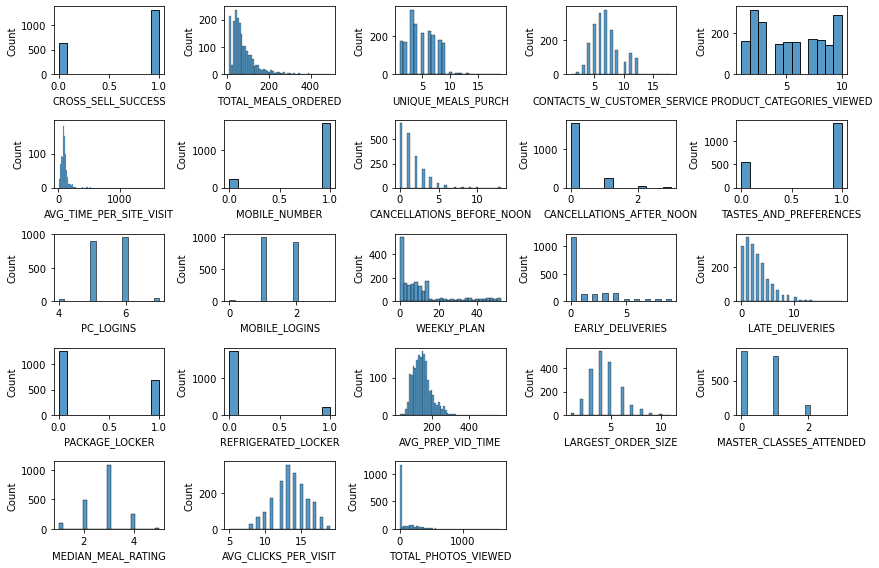

In [6]:
# Creating histogram for each variables

# Setting figure size
fig, ax = plt.subplots(figsize = (12, 8))

# Initializing a count
count = 0

# Looping to create histogram of each 23 variables
for col in apprentice_subset:

    # Break condition
    if count == 23:
        break
    
    # Increasing count
    count += 1
    
    # Preparing histograms
    plt.subplot(5, 5, count)
    sns.histplot(x = apprentice_subset[col],)

# Formatting and displaying the plot
plt.tight_layout()
plt.show()

<br>
<h3> C. SUBSETTING THE DATA </h3>

Based on the histograms and the dataset dictionary, variables can be split into two groups. 

List of explanatory variables:
- TOTAL_MEALS_ORDERED
- UNIQUE_MEALS_PURCH
- CONTACTS_W_CUSTOMER_SERVICE
- AVG_TIME_PER_SITE_VISIT 
- WEEKLY_PLAN
- CANCELLATIONS_BEFORE_NOON
- EARLY_DELIVERIES
- LATE_DELIVERIES
- AVG_PREP_VID_TIME
- LARGEST_ORDER_SIZE
- AVG_CLICKS_PER_VISIT
- TOTAL_PHOTOS_VIEWED

List of variables to drop from dataset (variables that are in a defined range or have limited values)
- CROSS_SELL_SUCCESS: value of 0 or 1
- PRODUCT_CATEGORIES_VIEWED: value between 1 and 10 
- MOBILE_NUMBER: value of 0 or 1
- TASTES_AND_PREFERENCES: value of 0 or 1
- PACKAGE_LOCKER: value of 0 or 1
- REFRIGERATED_LOCKER: value of 0 or 1
- MEDIAN_MEAL_RATING: value between 1 and 5
- MOBILE_LOGINS: limited values
- PC_LOGINS: limited values
- CANCELLATIONS_AFTER_NOON: limited values
- MASTER_CLASSES_ATTENDED: limited values

In [7]:
# Removing variables from dataset
apprentice_subset = apprentice_subset.drop(['MOBILE_LOGINS', 'PC_LOGINS', 'CANCELLATIONS_AFTER_NOON', 'MASTER_CLASSES_ATTENDED', 'PRODUCT_CATEGORIES_VIEWED','MEDIAN_MEAL_RATING','CROSS_SELL_SUCCESS', 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES','PACKAGE_LOCKER', 'REFRIGERATED_LOCKER'], axis = 1)

<br>
<h3> D. SCALING THE DATA AND CREATING CORRELATION MATRIX </h3>
<br>
In this step, the data is transformed to fit a range of zero to one. The heat map is created from the scaled data and shows the correlation between different variables. 

UNIQUE_MEALS_PURCH, CONTACTS_WITH_CUSTOMER_SERVICES, CANCELLATIONS_BEFORE_NOON, WEEKLY_PLANS, EARLY_DELIVERIES AND LATE_DELIVERIES have almost no effect on other variables.

The time spent on cooking instructions videos is highly correlated to the average number of meal sets per order and moderately correlated to the total number of meals ordered by the customer. However, the time spent on cooking instructions videos is negatively correlated to the number of clicks on the websites. Probably because the videos are accessible in a few clicks.


In [8]:
# Scaling the data with the user defined function scaler
apprentice_scaled = scaler(df = apprentice_subset)

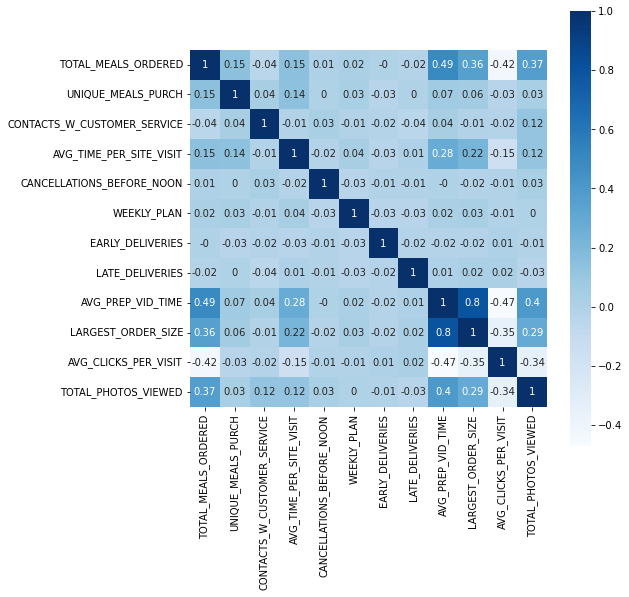

In [9]:
# Creating a correlation matrix 

# Setting plot size
fig, ax = plt.subplots(figsize = (8, 8))

# Developing a correlation matrix object
df_corr = apprentice_scaled.corr(method = 'pearson').round(decimals = 2)

# Creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)

# Displaying the heatmap
plt.show()

<br>
<h1> PART III: PRINCIPAL COMPONENT ANALYSIS </h1>
<br>
<h3> A. PCA ANALYSIS WITHOUT COMPONENTS LIMIT </h3>
<br>

Because the data in Apprentice Chef dataset is about customers, each principal component can be seen as a persona, a type of person with specific characteristics that will purchase from Apprentice Chef. Here is a summary of the different persona for that principal component analysis without limits on the number of components.

<b>PC 1:</b> This persona regroups frequent buyers that buy a high number of meals sets per order. This persona spends time watching the cooking preparation videos. Because this persona is a frequent buyer, they have a knowledge of how the website is structured and know how to use it. They spend some time looking at the meal set pictures.

<b>PC 2:</b> This persona regroups buyers who like experiencing different meal set and usually purchases a meal set once. They spend more time than other buyers on the website to decide what to buy. This persona does not contact customer services for help and is not cancelling its order.

<b>PC 3:</b> This persona contacts customer services more than any other persona, mainly for complaints. This persona also likes experiencing different meal sets and usually purchases a meal set only once. It rarely receives its order early.

<b>PC 4:</b> This persona is not a regular subscriber and probably uses the Apprentice Chef services once in a while. This persona often receives its order late which could explain why they are not subscribing more. Also, this person tends to cancel their order.

<b>PC 5:</b> This persona regroups customers that receive their order late but almost never contacts customer services. This persona does not have trouble with late deliveries

<b>PC 6:</b> This persona is customers that subscribed to Apprentice Chef services for a high number of weeks. This person often gets late and early delivery, probably due to the high amount of orders. This persona also sometimes cancels their order.

<b>PC 7:</b> This persona is cautious with their use of Apprentice Chef services. They spend a high amount of time on the website but have not ordered a lot of meal sets. They often re-buy meal sets they purchased in the past.

<b>PC 8:</b> This persona also spends a lot of time on the Apprentice Chef website. They also re-order previous meal sets and do not necessarily watch the preparation videos. This is probably due to the fact that they order the same meals. Each of their order is small.

<b>PC 9:</b> This persona is paying attention to details. The customers included in this persona click on more pages and buttons than other customers. They also look scrupulously at the photos.

<b>PC 10:</b> This persona is a regular buyer and accumulates past orders with Apprentice Chef. They are also attentive and clicks on numerous pages and button on the website. However, they do not pay particular attention to photos.

<b>PC 11:</b> The last persona includes a customer who uses the Apprentice website to watch instructions videos but has a small order size. This group might benefit from the cooking lessons offered on the website and cook while getting ingredients elsewhere. The scree plot is used to determine the number of components responsible for the variance in the data. The scree plot above shows that only two components can be used. The analysis of the two components can be found below.
<br>

In [10]:
# Creating a pca objet
pca = PCA(n_components = None,
          random_state = 219)

# Fitting and transforming the scaled data
customer_pca = pca.fit_transform(apprentice_scaled)

In [11]:
# Component number count
component_number = 0

# Looping for each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.239
PC 2: 0.093
PC 3: 0.091
PC 4: 0.086
PC 5: 0.083
PC 6: 0.081
PC 7: 0.077
PC 8: 0.073
PC 9: 0.064
PC 10: 0.054
PC 11: 0.045
PC 12: 0.014


In [12]:
# Factors loadings

# Transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))

# Naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(apprentice_scaled.columns)

# Checking the result
print(factor_loadings_df)

                               0     1     2     3     4     5     6     7   \
TOTAL_MEALS_ORDERED          0.41 -0.04 -0.02 -0.03  0.07  0.15 -0.04 -0.39   
UNIQUE_MEALS_PURCH           0.10  0.39  0.53  0.18  0.48  0.11 -0.06 -0.38   
CONTACTS_W_CUSTOMER_SERVICE  0.03 -0.40  0.58  0.03  0.04 -0.60  0.18  0.19   
AVG_TIME_PER_SITE_VISIT      0.23  0.44  0.17  0.08  0.22  0.03 -0.04  0.59   
CANCELLATIONS_BEFORE_NOON    0.00 -0.37  0.26  0.41 -0.10  0.68  0.33  0.21   
WEEKLY_PLAN                  0.03  0.34  0.23 -0.56 -0.35  0.10  0.61 -0.08   
EARLY_DELIVERIES            -0.02 -0.22 -0.35 -0.23  0.74  0.01  0.47  0.07   
LATE_DELIVERIES             -0.01  0.28 -0.27  0.65 -0.13 -0.33  0.50 -0.20   
AVG_PREP_VID_TIME            0.52  0.01 -0.10  0.01 -0.05 -0.05  0.01  0.20   
LARGEST_ORDER_SIZE           0.46  0.08 -0.16  0.02 -0.08 -0.04  0.01  0.28   
AVG_CLICKS_PER_VISIT        -0.40  0.15  0.06  0.04  0.07 -0.05  0.01  0.22   
TOTAL_PHOTOS_VIEWED          0.36 -0.29  0.10 -0.03 

<br>
<h3> B. PCA ANALYSIS WITH COMPONENTS LIMIT </h3>

The scree plot is used to determine the number of components responsible for the variance in the data. The scree plot above shows that only two components can be used. The analysis of the two components can be found below.

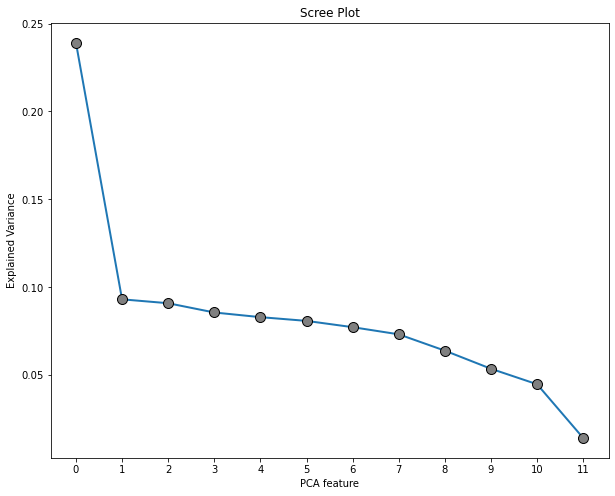

In [13]:
# Creating a scree-plot with the user designed function to determine the number of components
scree_plot(pca_object = pca)

PC 1: 0.239
PC 2: 0.093


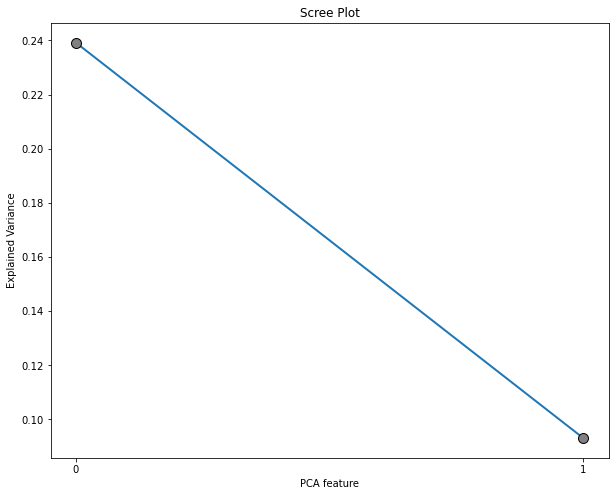

In [14]:
# Creating a pca objet
pca_2 = PCA(n_components = 2,
            random_state = 219)


# Fitting and transforming the scaled data
pca_2.fit_transform(apprentice_scaled)

# Component number count
component_number = 0

# Looping for each principal component
for variance in pca_2.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")
    
# Creating another scree plot with 2 components
scree_plot(pca_object = pca_2,
           export     = False)

In [15]:
# Factors loadings

# Transposing pca components
factor_loadings_df2 = pd.DataFrame(np.transpose(pca_2.components_.round(decimals = 2)))

# Naming rows as original features
factor_loadings_df2 = factor_loadings_df2.set_index(apprentice_scaled.columns)

# Checking the result
print(factor_loadings_df2)

                                0     1
TOTAL_MEALS_ORDERED          0.41 -0.04
UNIQUE_MEALS_PURCH           0.10  0.39
CONTACTS_W_CUSTOMER_SERVICE  0.03 -0.40
AVG_TIME_PER_SITE_VISIT      0.23  0.44
CANCELLATIONS_BEFORE_NOON    0.00 -0.37
WEEKLY_PLAN                  0.03  0.34
EARLY_DELIVERIES            -0.02 -0.22
LATE_DELIVERIES             -0.01  0.28
AVG_PREP_VID_TIME            0.52  0.01
LARGEST_ORDER_SIZE           0.46  0.08
AVG_CLICKS_PER_VISIT        -0.40  0.15
TOTAL_PHOTOS_VIEWED          0.36 -0.29


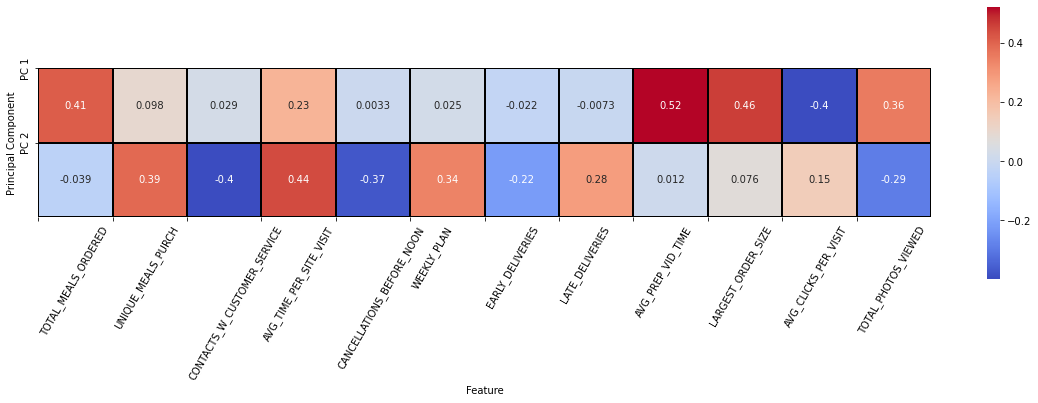

In [16]:
# Creating a heatmap to visualize factors loadings
fig, ax = plt.subplots(figsize = (20, 5))

# Developing a heatmap
sns.heatmap(pca_2.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')

# Setting plot options
plt.yticks([0, 1 ],
           ["PC 1", "PC 2"])

plt.xticks(range(0, 12),
           apprentice_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# Displaying the plot
plt.show()

<br>
The two personas described explains the majority of the variance n the data.

<b>Principal component 1:</b> 
The behavior of the first persona can explain an important part of the data. This persona has ordered a significant amount of meal sets on the Apprentice website over time. The number of meal sets per order they order is on average high. So, this persona is a recurrent and loyal customer. They know how to use the website and average fewer clicks than other customers. However, the customers included in this persona are surprisingly not subscribing to plans. They prefer orders whenever they need them and not be bound by a subscription. This persona usually takes time to look at the cooking preparation videos. They also look at the photos present on the website. 

<b>Principal component 2:</b> 
This persona regroups customers that spend a long time on the Apprentice Chef website when they order. But, they do not look at the photos. They subscribed to the company's service for a long period. The customers in this subgroup like to experience new meal sets and do not tend to order the same meal sets multiple times. However, this persona is not watching cooking videos instructions, they might be experienced with cooking. This persona is rarely contacting customer services, meaning they are satisfied with the products. They probably use Apprentice Chef as a regular way to get unique food.
<br><br><br><br>